In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.cluster import AgglomerativeClustering

In [4]:
df = pd.read_csv("SharedResponsesSurvey.csv")

In [5]:
#Dropping rows with NaN
df = df.dropna()
print("Number of rows: ",len(df))

#List of 130 countries saved in countries.csv 
list_c = pd.read_csv('countries.csv', encoding='utf8')
present = list_c.values.tolist()
#print(present)
present = np.asarray(present).flatten()
Num_Countries = len(list_c)

#Filtering countries to match list of 130 countries considered in the paper- excluding andorra

filter1 = df["UserCountry3"].isin(present) 
filtered = df[filter1]

#countries with atleast than 100 responses that are present in the above lit of countries 
country = filtered.groupby(['UserCountry3']).filter(lambda x: len(x) > 100)

Number of rows:  8841116


In [6]:
# Creating dummy variables for the attributes
pd.set_option('max_columns', None)

country = country.assign(Gender= 0,Fitness=0,SocialStatus=0, Age=0, Species=0, Utilitarian=0, NoLegalityCross=0, LegalCross=0, 
                         IllegalCross=0, Barrier_Mod=0)
country.loc[country['AttributeLevel'] == "Female", 'Gender'] = 1 
country.loc[country['AttributeLevel'] == "Fit", 'Fitness'] = 1 
country.loc[country['AttributeLevel'] == "High", 'SocialStatus'] = 1
country.loc[country['AttributeLevel'] == "Young", 'Age'] = 1
country.loc[country['AttributeLevel'] == "Hoomans", 'Species'] = 1
country.loc[country['AttributeLevel'] == "More", 'Utilitarian'] = 1
country.loc[country['CrossingSignal'] == 0, 'NoLegalityCross'] = 1
country.loc[country['CrossingSignal'] == 1, 'LegalCross'] = 1
country.loc[country['CrossingSignal'] == 2, 'IllegalCross'] = 1
country.loc[country['Barrier'] == 0, 'Barrier_Mod'] = 1 # 0 - Passenger, 1 - Pedestrian

country.head(5)

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceIsOmission,NumberOfCharacters,DiffNumberOFCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious,Gender,Fitness,SocialStatus,Age,Species,Utilitarian,NoLegalityCross,LegalCross,IllegalCross,Barrier_Mod
0,3ubu5Minm7ygqK3oa,-2147481563_6968366610050747.0,6.968367e+15,13,0,0,0,0,Female,Gender,Gender,Male,Female,0.0,2,0,1,Desktop,0.0,0.0,RUS,32,bachelor,male,35000,0.5,0.61,1,0,0,0,0,0,1,0,0,1
1,FKd9Fje2tWt2sHi6v,-2147481563_6968366610050747.0,6.968367e+15,8,0,1,0,0,Fat,Fitness,Fitness,Fit,Fat,0.0,2,0,0,Desktop,0.0,0.0,RUS,32,bachelor,male,35000,0.5,0.61,0,0,0,0,0,0,1,0,0,1
2,J6WRHLj8exr4bNwTm,-2147481563_6968366610050747.0,6.968367e+15,2,0,0,0,2,Young,Age,Age,Young,Old,1.0,2,0,0,Desktop,0.0,1.0,RUS,32,bachelor,male,35000,0.5,0.61,0,0,0,1,0,0,0,0,1,1
3,KcYXwqS3rTrbqdTY2,-2147481563_6968366610050747.0,6.968367e+15,1,0,1,0,2,Pets,Species,Species,Hoomans,Pets,0.0,3,0,0,Desktop,0.0,1.0,RUS,32,bachelor,male,35000,0.5,0.61,0,0,0,0,0,0,0,0,1,1
4,ZQsAWst58jK9HcKvx,-2147481563_6968366610050747.0,6.968367e+15,5,0,1,0,0,Fit,Fitness,Fitness,Fit,Fat,1.0,2,0,0,Desktop,0.0,1.0,RUS,32,bachelor,male,35000,0.5,0.61,0,1,0,0,0,0,1,0,0,1


In [7]:
# Dummy variables for interaction effects for attributes with restrictions

# To find amce for Legality, reference catergory is Illegal
country['IE_Nolegality_Ped'] = country['NoLegalityCross']*country['PedPed'] #Interaction effect between No legality and PedPed
country['IE_Legal_Ped'] = country['LegalCross']*country['PedPed'] #Interaction effect between legal crossing and PedPed

# To find amce for Passenger vs Pedestrian, reference catergory is Passenger
country['IE_Ped_Legal'] = country['LegalCross']*country['Barrier_Mod'] #Interaction effect between legal crossing and Barrier_Modified
country['IE_Ped_Illegal'] = country['IllegalCross']*country['Barrier_Mod'] #Interaction effect between illegal crossing and Barrier_Modified

country.head(2)

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,ScenarioType,DefaultChoice,NonDefaultChoice,DefaultChoiceIsOmission,NumberOfCharacters,DiffNumberOFCharacters,Saved,Template,DescriptionShown,LeftHand,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious,Gender,Fitness,SocialStatus,Age,Species,Utilitarian,NoLegalityCross,LegalCross,IllegalCross,Barrier_Mod,IE_Nolegality_Ped,IE_Legal_Ped,IE_Ped_Legal,IE_Ped_Illegal
0,3ubu5Minm7ygqK3oa,-2147481563_6968366610050747.0,6.968367e+15,13,0,0,0,0,Female,Gender,Gender,Male,Female,0.0,2,0,1,Desktop,0.0,0.0,RUS,32,bachelor,male,35000,0.5,0.61,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,FKd9Fje2tWt2sHi6v,-2147481563_6968366610050747.0,6.968367e+15,8,0,1,0,0,Fat,Fitness,Fitness,Fit,Fat,0.0,2,0,0,Desktop,0.0,0.0,RUS,32,bachelor,male,35000,0.5,0.61,0,0,0,0,0,0,1,0,0,1,1,0,0,0


In [8]:
#grouping rows country-wise
ctr = country.groupby(['UserCountry3'])
print("Number of countries: ",ctr.ngroups)
#print(ctr.size())
ct_size= ctr.size()

Number of countries:  129


In [9]:
#Caluculating AMCE for attributes with no restrictions and with restrictions seperately

from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
coef=[]
coef_leg = []
coef_passped = []
country=[]
LogReg = LogisticRegression()
for name,group in ctr:
    #print(type(name)
    #print(name)
    #ind.append(group)
    #Independent variables for attributes without restrictions
    attr= group[['Intervention','Fitness','Gender','SocialStatus','Age','Species','Utilitarian']]
    #To calculate AMCE for Legality- restriction: only in the case of pedestrians vs pedestrians
    IE_Legality = group[['NoLegalityCross','LegalCross','PedPed','IE_Nolegality_Ped','IE_Legal_Ped']]
    #To calculate AMCE for Relative to vehicle- restriction: No legality for passengers
    IE_PassPed = group[['Barrier_Mod','LegalCross','IllegalCross','IE_Ped_Legal','IE_Ped_Illegal']]
    outcome = group['Saved']
    
    #count of probablities to calculate weight
    Pedped_One= len(group[group.PedPed == 1])
    Pedped_Zero = len(group[group.PedPed == 1])
    Pedped_Legal_One= len(group[(group.PedPed == 1) & (group.LegalCross == 1)])
    Pedped_Legal_Zero= len(group[(group.PedPed == 0) & (group.LegalCross == 1)])
    
    Barr_One= len(group[group.Barrier_Mod==1])
    Barr_One_LegalZero= len(group[(group.Barrier_Mod==1) & (group.CrossingSignal == 0)])
    
    #Regression to find AMCE of 7 attributes
    LogReg.fit(attr, outcome)
    c = LogReg.coef_
    
    #Regression to find AMCE for legality
    LogReg.fit(IE_Legality, outcome)
    leg_c = LogReg.coef_
    leg_c = np.asarray(leg_c).flatten()
    
    # wt = 1 / (p(P=0 and legal) / p(P=0))
    x = (Pedped_Zero/Pedped_Legal_Zero) * leg_c[1]
    # wt = 1 / (p(P=1 and legal) / p(P=1))
    y = (Pedped_One/Pedped_Legal_One) * leg_c[4]
    LegCoef = x+y
    
    #Regression to find AMCE of relation to vehicle
    LogReg.fit(IE_PassPed, outcome)
    passped_c = LogReg.coef_
    passped_c = np.asarray(passped_c).flatten()
    
    #wt = p(B=1 and L=0)/p(B)
    PasspedCoef = (Barr_One/Barr_One_LegalZero) * passped_c[0]
    
    
    
    #print(attr)
    country.append(name)
    coef.append(c)
    coef_leg.append(LegCoef)
    coef_passped.append(PasspedCoef)
    
#Combining the attributes
cf_a = np.asarray(coef)
cf_a = np.reshape(cf_a, ((len(coef)),7))
#print(cf_a.shape)

coef_leg= np.asarray(coef_leg)
coef_leg= np.reshape(coef_leg, ((len(coef)),1))

coef_passped= np.asarray(coef_passped)
coef_passped= np.reshape(coef_passped, ((len(coef)),1))



cf_a = np.append(cf_a,coef_leg, axis=1)
cf_a = np.append(cf_a,coef_passped, axis=1)
#print(cf_a.shape)

# Converting coefficients to Z scores
z_cf = stats.zscore(cf_a)

In [10]:

#Clustering 
three_clus = AgglomerativeClustering( n_clusters=3, affinity='euclidean', linkage='ward')
three_clus.fit(z_cf)
Label = three_clus.labels_
#print(Label)

comb =[]
for i in range((len(coef))):
    comb.append([Label[i],country[i]])
    
Seg={}
for i in comb:
    if (i[0]) in Seg:
        #print(i[0])
        Seg[(i[0])].append(i[1])
    else:
        Seg[(i[0])]= [i[1]]
        

for i in range(3):
    print("Cluster: {} \n {} \n ".format(i, Seg[i]))

Cluster: 0 
 ['AFG', 'AGO', 'BHR', 'BHS', 'BRA', 'BRB', 'BRN', 'CHN', 'GEO', 'GGY', 'GUM', 'HND', 'IRQ', 'ISL', 'JAM', 'JEY', 'JPN', 'KEN', 'KGZ', 'LKA', 'MAC', 'MCO', 'MDG', 'MDV', 'MMR', 'MNG', 'MUS', 'NGA', 'NPL', 'PRY', 'SYR', 'THA', 'TWN'] 
 
Cluster: 1 
 ['ARG', 'ARM', 'AZE', 'BIH', 'BOL', 'CHL', 'COL', 'CRI', 'CYP', 'DOM', 'DZA', 'ECU', 'GTM', 'IDN', 'IMN', 'JOR', 'KAZ', 'KHM', 'KOR', 'KWT', 'LBN', 'MEX', 'MKD', 'MNE', 'MYS', 'NIC', 'PAK', 'PER', 'PHL', 'PRI', 'PSE', 'QAT', 'SAU', 'SLV', 'TTO', 'TUN', 'TUR', 'URY', 'VEN', 'VNM'] 
 
Cluster: 2 
 ['ALB', 'ARE', 'AUS', 'AUT', 'BEL', 'BGD', 'BGR', 'BLR', 'CAN', 'CHE', 'CZE', 'DEU', 'DNK', 'EGY', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HKG', 'HRV', 'HUN', 'IND', 'IRL', 'IRN', 'ISR', 'ITA', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MLT', 'MTQ', 'NCL', 'NLD', 'NOR', 'NZL', 'OMN', 'PAN', 'POL', 'PRT', 'PYF', 'REU', 'ROU', 'RUS', 'SGP', 'SRB', 'SVK', 'SVN', 'SWE', 'UKR', 'USA', 'UZB', 'ZAF'] 
 


In [28]:
"""#Writing as csv
cluster_0 = Seg[0]
cluster_1 = Seg[1]
cluster_2 = Seg[2]

import csv
with open('Cluster1.txt', 'w') as f:
    for item in cluster_0:
        f.write("%s\n" % item)
with open('Cluster2.txt', 'w') as f:
    for item in cluster_1:
        f.write("%s\n" % item)
        
with open('Cluster3.txt', 'w') as f:
    for item in cluster_2:
        f.write("%s\n" % item)"""


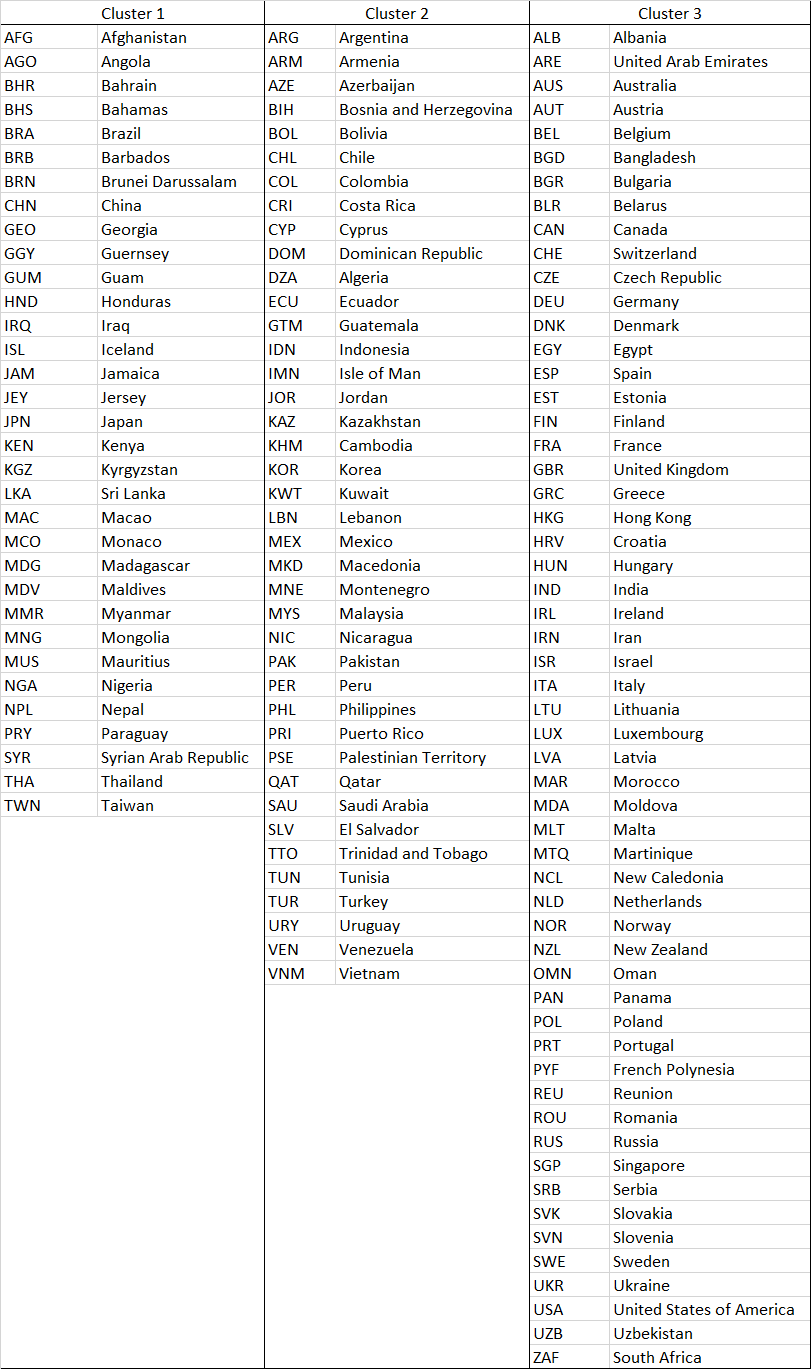